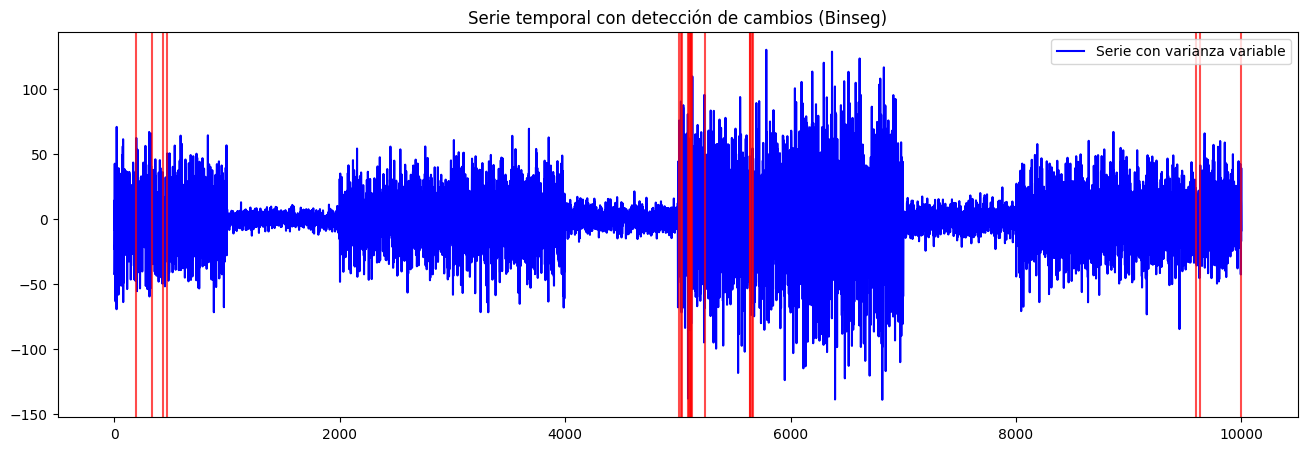

In [1]:
# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Función para generar una serie con varianza variable
def serie_varianza_variable(num_segmentos, tamano_segmento):
    serie = np.concatenate([
        np.random.normal(0, np.random.randint(1, 50), tamano_segmento)
        for _ in range(num_segmentos)
    ])
    return pd.Series(serie)

# Generar la serie
serie2 = serie_varianza_variable(10, 1000)
serie2_np = serie2.values

# Aplicar Binseg y obtener los puntos de cambio
def detectar_cambios_binseg(ts, modelo="l2", num_cambios=20):
    binseg = rpt.Binseg(model=modelo).fit(ts)
    puntos_cambio = binseg.predict(n_bkps=num_cambios)
    return puntos_cambio

# Detectar los 20 cambios más importantes
puntos_cambio2 = detectar_cambios_binseg(serie2_np, modelo="l2", num_cambios=20)

# Función para graficar la serie con los puntos de cambio detectados
def graficar_cambios(serie, puntos_cambio):
    plt.figure(figsize=(16, 5))
    plt.plot(serie, label="Serie con varianza variable", color='blue')

    for x in puntos_cambio:
        plt.axvline(x, lw=1.5, color='red', alpha=0.7)

    plt.title("Serie temporal con detección de cambios (Binseg)")
    plt.legend(loc="upper right")
    plt.show()

# Graficar la serie con los cambios detectados
graficar_cambios(serie2, puntos_cambio2)



### 📊 Observaciones sobre Binseg

El algoritmo **Binseg** se ha equivocado en la mayoría de los puntos de cambio y detecto puntos erroneos que no deben estar, como se muestra anteriormente. **BinSeg** no los encuentra porque los datos antes y después de esos puntos son tan similares que el algoritmo no puede identificar la diferencia.